# Feature engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
def ticket_splitting_number(ticket):
    if ticket == "LINE":
        ticket_number = 0
    elif len(ticket.split()) > 1:
        ticket_number = ticket.split()[-1]
    else:
        ticket_number = ticket
    return ticket_number

def ticket_splitting_category(ticket):
    if ticket == "LINE":
        ticket_cat = 1
    elif len(ticket.split()) > 1:
        ticket_cat = 1
    else:
        ticket_cat = 0
    return ticket_cat 

df["Ticket_category"] = df["Ticket"].apply(lambda x : ticket_splitting_category(x))
df["Ticket_number"] = df["Ticket"].apply(lambda x : ticket_splitting_number(x))
df["Ticket_number"] = df["Ticket_number"].astype("float")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_category,Ticket_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,373450.0


In [4]:
#df["Ticket_number"] = df["Ticket_number"].replace(to_replace = [df["Ticket_number"]>1000000], value = [df["Ticket_number"].mean()])
df.loc[df["Ticket_number"] > 1000000, "Ticket_number"] = df["Ticket_number"].mean()

In [5]:
df["Surname"] = df.Name.apply(lambda x : x.split(",")[0])
#df["Familly_temp"] = df[["Surname", "Ticket_number"]].apply(lambda x,y : )
df["Familly_temp"] =  df["Surname"] + df["Ticket_number"].astype("str")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_category,Ticket_number,Surname,Familly_temp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,21171.00000,Braund,Braund21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,17599.00000,Cumings,Cumings17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,296989.12009,Heikkinen,Heikkinen296989.12008978677
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,113803.00000,Futrelle,Futrelle113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,373450.00000,Allen,Allen373450.0


In [6]:
df["Familly_count"] = df.groupby("Familly_temp").PassengerId.transform("count")
df["Ticket_count"] = df.groupby("Ticket").PassengerId.transform("count")
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_category,Ticket_number,Surname,Familly_temp,Familly_count,Ticket_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,21171.00000,Braund,Braund21171.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,17599.00000,Cumings,Cumings17599.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,296989.12009,Heikkinen,Heikkinen296989.12008978677,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,113803.00000,Futrelle,Futrelle113803.0,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,373450.00000,Allen,Allen373450.0,1,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,330877.00000,Moran,Moran330877.0,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,17463.00000,McCarthy,McCarthy17463.0,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,349909.00000,Palsson,Palsson349909.0,4,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,347742.00000,Johnson,Johnson347742.0,3,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,237736.00000,Nasser,Nasser237736.0,2,2


In [7]:
df["Is_with_familly"] = df.Familly_count.apply(lambda x : 1 if x > 1 else 0)
df["Fare_per_person"] = df["Fare"]/df["Ticket_count"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_category,Ticket_number,Surname,Familly_temp,Familly_count,Ticket_count,Is_with_familly,Fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,21171.00000,Braund,Braund21171.0,1,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,17599.00000,Cumings,Cumings17599.0,1,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,296989.12009,Heikkinen,Heikkinen296989.12008978677,1,1,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,113803.00000,Futrelle,Futrelle113803.0,2,2,1,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,373450.00000,Allen,Allen373450.0,1,1,0,8.0500


In [8]:
df2 = df.drop(["Name","Ticket","Surname","Familly_temp","Familly_count","Ticket_count","Fare"], axis =1)
df2.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Ticket_category,Ticket_number,Is_with_familly,Fare_per_person
0,1,0,3,male,22.0,1,0,NaN,S,1,21171.00000,0,7.2500
1,2,1,1,female,38.0,1,0,C85,C,1,17599.00000,0,71.2833
2,3,1,3,female,26.0,0,0,NaN,S,1,296989.12009,0,7.9250
3,4,1,1,female,35.0,1,0,C123,S,0,113803.00000,1,26.5500
4,5,0,3,male,35.0,0,0,NaN,S,0,373450.00000,0,8.0500


In [9]:
df2["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [10]:
condition1 = (df["Pclass"] == 1) & (df["Sex"] == "female")
condition2 = (df["Pclass"] == 1) & (df["Sex"] == "male")
condition3 = (df["Pclass"] == 2) & (df["Sex"] == "female")
condition4 = (df["Pclass"] == 2) & (df["Sex"] == "male")
condition5 = (df["Pclass"] == 3) & (df["Sex"] == "female")
condition6 = (df["Pclass"] == 3) & (df["Sex"] == "male")
df2["Age"] = np.select([
                        condition1 & (df["Age"].isna()),
                        condition2 & (df["Age"].isna()), 
                        condition3 & (df["Age"].isna()), 
                        condition4 & (df["Age"].isna()), 
                        condition5 & (df["Age"].isna()), 
                        condition6 & (df["Age"].isna())
                        ],
                       [df[condition1]["Age"].mean(), df[condition2]["Age"].mean(), df[condition3]["Age"].mean(),
                       df[condition4]["Age"].mean(),df[condition5]["Age"].mean(), df[condition6]["Age"].mean()],
                       default = df["Age"])
df2.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Ticket_category,Ticket_number,Is_with_familly,Fare_per_person
0,1,0,3,male,22.000000,1,0,NaN,S,1,21171.00000,0,7.25000
1,2,1,1,female,38.000000,1,0,C85,C,1,17599.00000,0,71.28330
2,3,1,3,female,26.000000,0,0,NaN,S,1,296989.12009,0,7.92500
3,4,1,1,female,35.000000,1,0,C123,S,0,113803.00000,1,26.55000
4,5,0,3,male,35.000000,0,0,NaN,S,0,373450.00000,0,8.05000
5,6,0,3,male,26.507589,0,0,NaN,Q,0,330877.00000,0,8.45830
6,7,0,1,male,54.000000,0,0,E46,S,0,17463.00000,0,51.86250
7,8,0,3,male,2.000000,3,1,NaN,S,0,349909.00000,1,5.26875
8,9,1,3,female,27.000000,0,2,NaN,S,0,347742.00000,1,3.71110
9,10,1,2,female,14.000000,1,0,NaN,C,0,237736.00000,1,15.03540


<AxesSubplot:xlabel='Category_cabin', ylabel='Fare_per_person'>

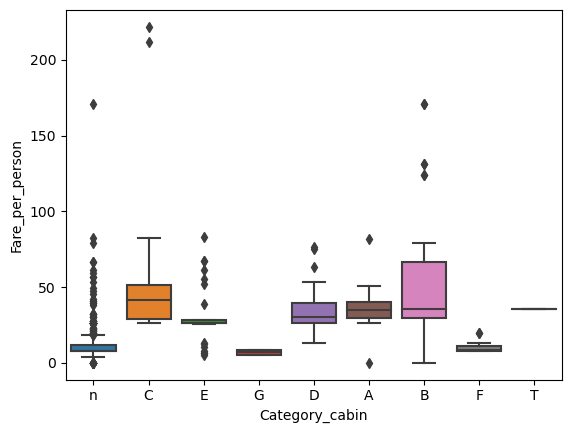

In [11]:
df["Category_cabin"]= df["Cabin"].apply(lambda x : str(x)[0])
sns.boxplot(x="Category_cabin" , y = "Fare_per_person", data = df)

In [12]:
df[(df["Is_with_familly"]==1) & (df["Familly_count"]> 2)].sort_values("Category_cabin", ascending = True).head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Ticket_category,Ticket_number,Surname,Familly_temp,Familly_count,Ticket_count,Is_with_familly,Fare_per_person,Category_cabin
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,...,S,0,113760.00000,Carter,Carter113760.0,4,4,1,30.000000,B
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,...,S,0,113760.00000,Carter,Carter113760.0,4,4,1,30.000000,B
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,...,S,0,113760.00000,Carter,Carter113760.0,4,4,1,30.000000,B
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.00,1,2,113760,120.0000,...,S,0,113760.00000,Carter,Carter113760.0,4,4,1,30.000000,B
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,...,S,0,113781.00000,Allison,Allison113781.0,3,4,1,37.887500,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,...,S,0,19950.00000,Fortune,Fortune19950.0,4,4,1,65.750000,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,...,S,0,19950.00000,Fortune,Fortune19950.0,4,4,1,65.750000,C
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.00,0,2,17421,110.8833,...,C,0,17421.00000,Thayer,Thayer17421.0,3,4,1,27.720825,C
698,699,0,1,"Thayer, Mr. John Borland",male,49.00,1,1,17421,110.8833,...,C,0,17421.00000,Thayer,Thayer17421.0,3,4,1,27.720825,C
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,...,S,0,19950.00000,Fortune,Fortune19950.0,4,4,1,65.750000,C


In [13]:
df2["SibSp"] = df2["SibSp"].replace(to_replace = [3,4,5,8], value = [2,2,2,2])
df2["Parch"] = df2["Parch"].replace(to_replace = [3,4,5,6], value = [2,2,2,2])

In [14]:
Pclass_dum = pd.get_dummies(df2["Pclass"], prefix = "Pclass")
SibSp_dum = pd.get_dummies(df2["SibSp"], prefix = "SibSp")
Parch_dum = pd.get_dummies(df2["Parch"], prefix = "Parch")
Embarked_dum = pd.get_dummies(df2["Embarked"], prefix = "Embarked")

In [15]:
df2 = pd.concat([df2,Pclass_dum,SibSp_dum,Parch_dum,Embarked_dum], axis=1)
#df2 = pd.concat([df2,Pclass_dum,SibSp_dum,Parch_dum], axis=1)
#df2 = pd.concat([df2,Pclass_dum,Embarked_dum], axis=1)
df2["Sex"] = df2["Sex"].replace(to_replace = ["male","female"], value = [0,1])
df2 = df2.drop(["Pclass","SibSp","Parch","Embarked"], axis =1)

In [16]:
df2 = df2.drop(["Cabin"], axis =1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
df2[["Age","Fare_per_person","Ticket_number"]] = mmscaler.fit_transform(df2[["Age","Fare_per_person","Ticket_number"]])

In [18]:
df2 = df2.drop(["PassengerId"], axis =1)

In [19]:
df2.head(50)

,Survived,Sex,Age,Ticket_category,Ticket_number,Is_with_familly,Fare_per_person,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,Parch_0,Parch_1,Parch_2,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0.271174,1,0.053714,0,0.032690,0,0,1,0,1,0,1,0,0,0,0,1
1,1,1,0.472229,1,0.044652,0,0.321416,1,0,0,0,1,0,1,0,0,1,0,0
2,1,1,0.321438,1,0.753512,0,0.035734,0,0,1,1,0,0,1,0,0,0,0,1
3,1,1,0.434531,0,0.288738,1,0.119714,1,0,0,0,1,0,1,0,0,0,0,1
4,0,0,0.434531,0,0.947506,0,0.036297,0,0,1,1,0,0,1,0,0,0,0,1
5,0,0,0.327816,0,0.839491,0,0.038138,0,0,1,1,0,0,1,0,0,0,1,0
6,0,0,0.673285,0,0.044307,0,0.233847,1,0,0,1,0,0,1,0,0,0,0,1
7,0,0,0.019854,0,0.887778,1,0.023757,0,0,1,0,0,1,0,1,0,0,0,1
8,1,1,0.334004,0,0.882280,1,0.016733,0,0,1,1,0,0,0,0,1,0,0,1
9,1,1,0.170646,0,0.603177,1,0.067794,0,1,0,0,1,0,1,0,0,1,0,0


In [20]:
df2.columns

Index(['Survived', 'Sex', 'Age', 'Ticket_category', 'Ticket_number',
       'Is_with_familly', 'Fare_per_person', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'Parch_0', 'Parch_1',
       'Parch_2', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [21]:
df2.to_csv("train_processed.csv")

<AxesSubplot:>

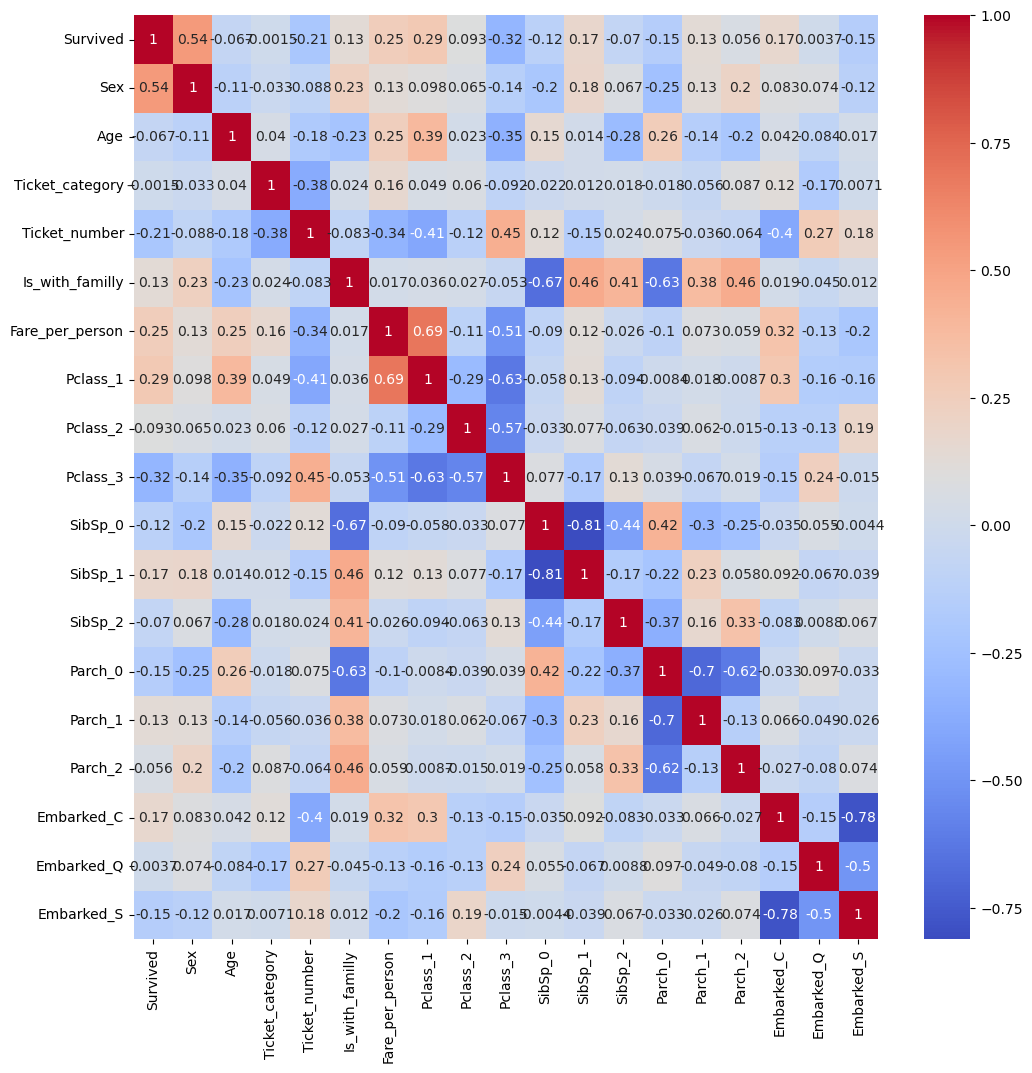

In [23]:
plt.figure(figsize = (12,12))
sns.heatmap(df2.corr(), annot=True, cmap = "coolwarm" )